**Modelos basados en árbol / Análisis y Predicción de Precios de Autos (Core)**

## **Análisis y Predicción de Precios de Autos (Core)**
 
**Objetivo:** Aplicar técnicas de regresión lineal, KNN y árboles de decisión para predecir precios de autos utilizando un dataset de Kaggle. Realizar un Análisis Exploratorio de Datos (EDA) completo y comparar el rendimiento de los modelos mediante benchmarking.
 
**Dataset:** Automobile Dataset
 
**Descripción del Dataset:** Este conjunto de datos contiene información detallada sobre diferentes modelos de autos, incluyendo características técnicas y precios. El objetivo es predecir el precio de los autos basándose en sus características.
 
**Instrucciones:**
 
**Parte 1:** Análisis Exploratorio de Datos (EDA)

 **1. Carga y Exploración de Datos:**

Cargar el dataset y revisar la estructura básica. 

Descripción de las variables y su distribución. 

Detección y tratamiento de valores nulos. 

Identificación y tratamiento de outliers. 

Análisis de correlación entre variables. 

**Parte 2: Preparación de Datos**

 **2. Preprocesamiento:**

Selección de características importantes.

Transformación de variables categóricas.

División del conjunto de datos en entrenamiento y prueba.

Escalado de características.

**Parte 3: Modelos de Regresión**

**3. Regresión Lineal:**

Entrenamiento del modelo.
 
Evaluación del rendimiento (MSE y R²).
 

**4. K-Nearest Neighbors (KNN):**

Entrenamiento del modelo.
Evaluación del rendimiento (MSE y R²).

**5. Árbol de Decisión:**

Entrenamiento del modelo.
Evaluación del rendimiento (MSE y R²).


**Parte 4: Benchmarking y Comparación de Modelos**

 **6. Comparación de Modelos:**

Comparar los resultados de los tres modelos en términos de MSE y R².

Discusión sobre las diferencias en el rendimiento de los modelos.

**Conclusión**

**7. Interpretación de Resultados:**

Analizar cuál de los modelos es más adecuado para el problema de predicción de precios de autos.

Discutir posibles mejoras y próximos pasos, como el ajuste de hiperparámetros o el uso de técnicas avanzadas.

Tareas Adicionales y Desafíos

**8. Desafíos Adicionales:**

**Optimización de Modelos:** Usar GridSearchCV para optimizar los hiperparámetros de KNN y el Árbol de Decisión.

**Feature Engineering:** Crear nuevas características basadas en las existentes para mejorar el rendimiento del modelo.

**Validación Cruzada:** Implementar validación cruzada para evaluar la estabilidad de los modelos.

**Nota:** Asegúrate de documentar cada paso del proceso, incluyendo la justificación de las decisiones tomadas durante el preprocesamiento y la selección de modelos. Presenta un informe final con tus hallazgos, conclusiones y posibles mejoras.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('../../data/ml/Automobile_data.csv')

# Exploración de datos
print(df.head())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [3]:
print(df.describe())

        symboling  wheel-base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  
count   205.000000   205.000000         205.000000  205.000000   205.000000  
mean   2555.565854   126.907317          10.142537   25.219512    30.751220  
std     520.680204    41.642693           3.972040    6.542142     6.886443  
min    1488.000000    61.000000           7.000000   13.000000    

In [4]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"{column}: {df[column].unique()}")

normalized-losses: ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
make: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type: ['gas' 'diesel']
aspiration: ['std' 'turbo']
num-of-doors: ['two' 'four' '?']
body-style: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels: ['rwd' 'fwd' '4wd']
engine-location: ['front' 'rear']
engine-type: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
num-of-cylinders: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuel-system: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
bore: ['3.47' '2.68' '3.19' '3

In [5]:
print(df.isnull().sum())

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [6]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")
df.head()

Número de registros duplicados: 0


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [7]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
symboling,205,0,0.0
normalized-losses,205,0,0.0
highway-mpg,205,0,0.0
city-mpg,205,0,0.0
peak-rpm,205,0,0.0
horsepower,205,0,0.0
compression-ratio,205,0,0.0
stroke,205,0,0.0
bore,205,0,0.0
fuel-system,205,0,0.0


In [8]:
# Diccionario con descripciones de las variables
descripciones = {
    "symboling": "Clasificación de riesgo del automóvil",
    "normalized-losses": "Pérdidas normalizadas por riesgo de seguros",
    "make": "Fabricante del automóvil",
    "fuel-type": "Tipo de combustible utilizado",
    "aspiration": "Tipo de aspiración del motor (natural o turbo)",
    "num-of-doors": "Cantidad de puertas del automóvil",
    "body-style": "Estilo de la carrocería",
    "drive-wheels": "Ruedas de tracción",
    "engine-location": "Ubicación del motor (frontal o trasero)",
    "wheel-base": "Distancia entre los ejes del automóvil",
    "length": "Longitud total del automóvil",
    "width": "Ancho del automóvil",
    "height": "Altura total del automóvil",
    "curb-weight": "Peso en vacío del automóvil",
    "engine-type": "Tipo de motor",
    "num-of-cylinders": "Cantidad de cilindros en el motor",
    "engine-size": "Tamaño del motor en centímetros cúbicos",
    "fuel-system": "Sistema de combustible",
    "bore": "Diámetro del cilindro en pulgadas",
    "stroke": "Carrera del pistón en pulgadas",
    "compression-ratio": "Relación de compresión del motor",
    "horsepower": "Potencia del motor en caballos de fuerza",
    "peak-rpm": "Revoluciones máximas por minuto",
    "city-mpg": "Rendimiento en ciudad (millas por galón)",
    "highway-mpg": "Rendimiento en carretera (millas por galón)",
    "price": "Precio de venta del automóvil en USD"
}

# Convertir el diccionario en un DataFrame para verlo mejor
import pandas as pd
df_descripciones = pd.DataFrame(list(descripciones.items()), columns=["Variable", "Descripción"])
print(df_descripciones)


             Variable                                     Descripción
0           symboling           Clasificación de riesgo del automóvil
1   normalized-losses     Pérdidas normalizadas por riesgo de seguros
2                make                        Fabricante del automóvil
3           fuel-type                   Tipo de combustible utilizado
4          aspiration  Tipo de aspiración del motor (natural o turbo)
5        num-of-doors               Cantidad de puertas del automóvil
6          body-style                         Estilo de la carrocería
7        drive-wheels                              Ruedas de tracción
8     engine-location         Ubicación del motor (frontal o trasero)
9          wheel-base          Distancia entre los ejes del automóvil
10             length                    Longitud total del automóvil
11              width                             Ancho del automóvil
12             height                      Altura total del automóvil
13        curb-weigh

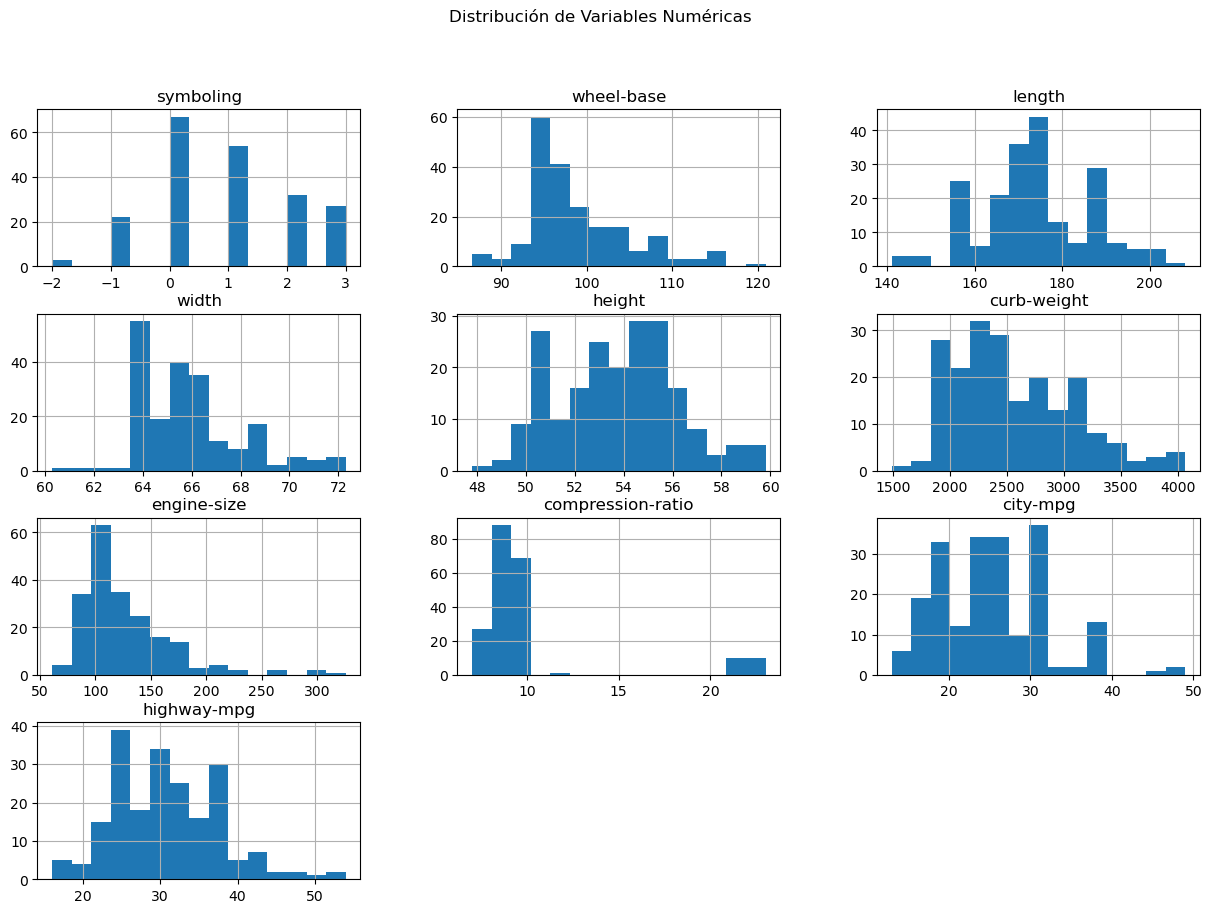

In [9]:
import matplotlib.pyplot as plt

# Graficar histogramas para cada columna numérica
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribución de Variables Numéricas')
plt.show()


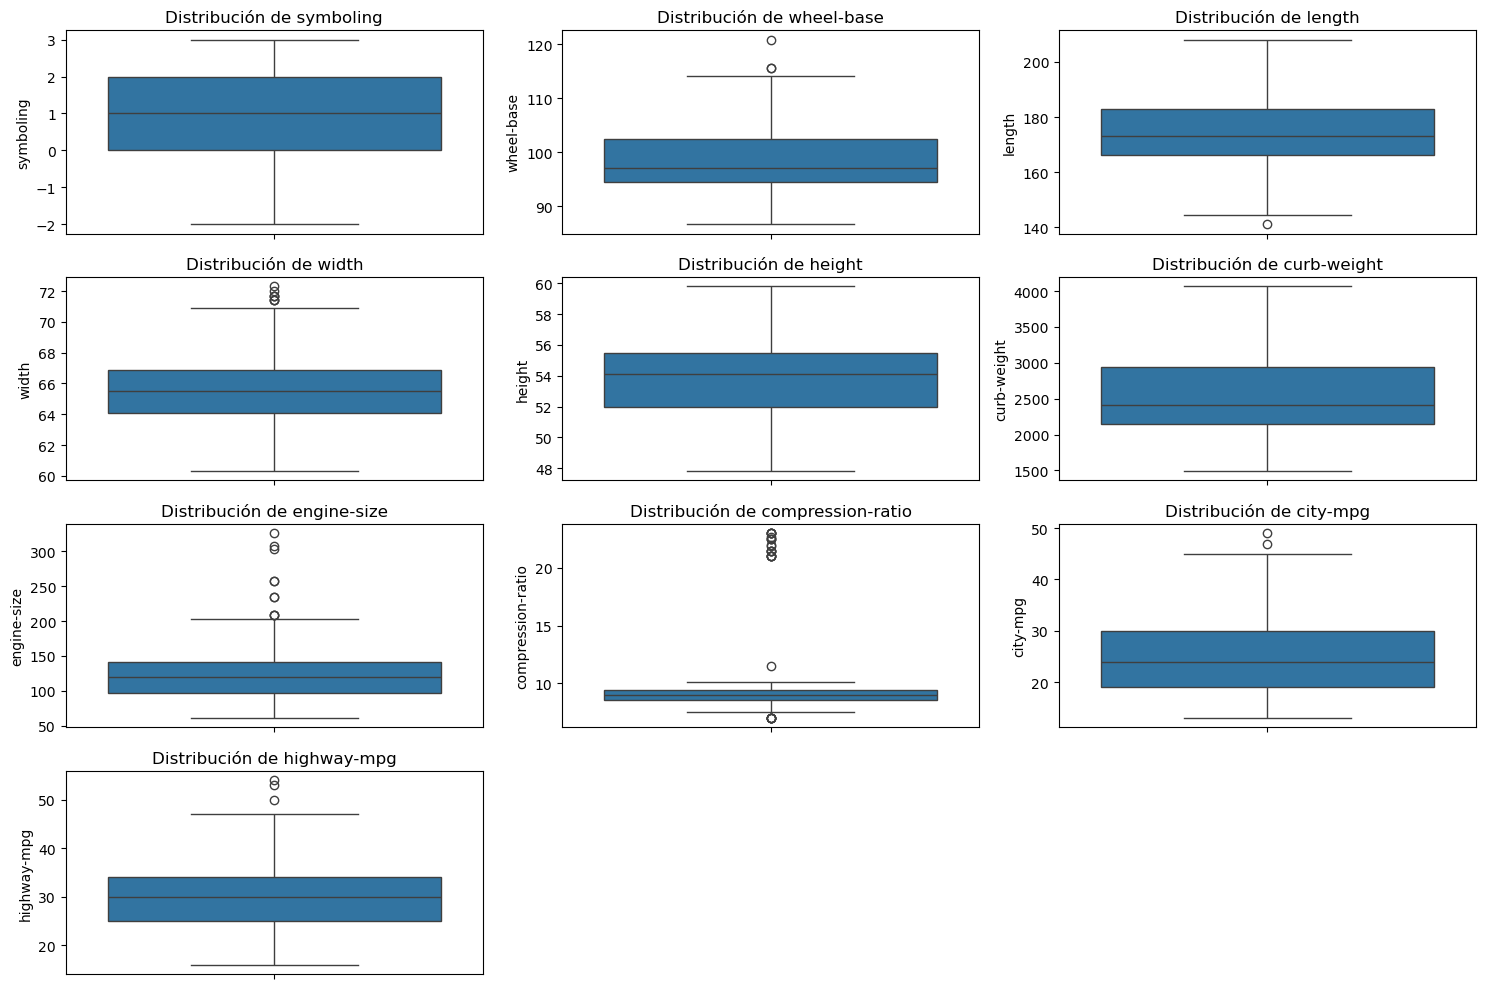

In [10]:
import seaborn as sns

# Crear un boxplot para cada columna numérica
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Distribución de {column}')
plt.tight_layout()
plt.show()


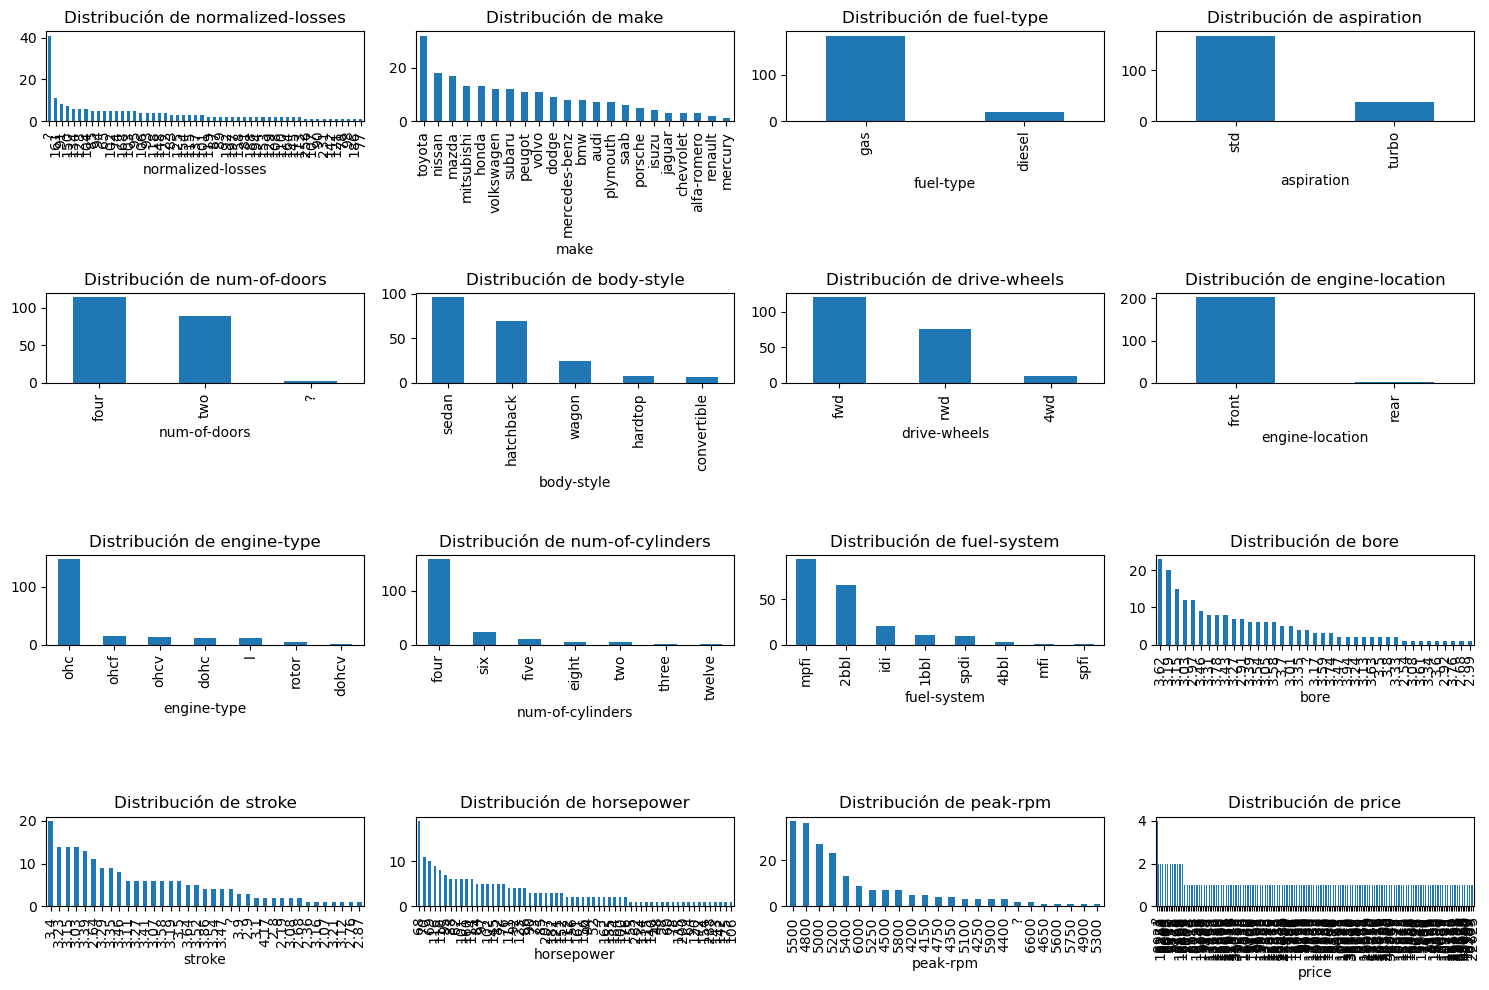

In [11]:
# Gráficos de barras para columnas categóricas
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['object']).columns, 1):
    plt.subplot(4, 4, i)
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Distribución de {column}')
plt.tight_layout()
plt.show()


In [12]:
# Mostrar cantidad de valores nulos por columna
valores_nulos = df.isnull().sum()
print(valores_nulos)


symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [15]:
# Convertir las columnas numéricas que están como 'object' a tipo numérico
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'], errors='coerce')
df['bore'] = pd.to_numeric(df['bore'], errors='coerce')
df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Convertir las columnas de tipo 'object' a 'category'
categorical_columns = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.astype('category'))

# Verificar la conversión
print(df.dtypes)


symboling               int64
normalized-losses     float64
make                 category
fuel-type            category
aspiration           category
num-of-doors         category
body-style           category
drive-wheels         category
engine-location      category
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type          category
num-of-cylinders     category
engine-size             int64
fuel-system          category
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
dtype: object


In [16]:
# Revisar valores nulos
print(df.isnull().sum())

# Tratar los valores nulos (por ejemplo, reemplazarlos con la media en las columnas numéricas)
df['bore'] = df['bore'].fillna(df['bore'].mean())
df['stroke'] = df['stroke'].fillna(df['stroke'].mean())
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
df['peak-rpm'] = df['peak-rpm'].fillna(df['peak-rpm'].mean())
df['price'] = df['price'].fillna(df['price'].mean())


symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [17]:
# Revisar valores nulos
print(df.isnull().sum())


symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64


In [18]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
normalized-losses,164,41,20.0
symboling,205,0,0.0
highway-mpg,205,0,0.0
city-mpg,205,0,0.0
peak-rpm,205,0,0.0
horsepower,205,0,0.0
compression-ratio,205,0,0.0
stroke,205,0,0.0
bore,205,0,0.0
fuel-system,205,0,0.0


In [25]:
print(df['normalized-losses'].isnull().sum())

3


In [26]:
# Rellenar valores nulos hacia adelante y hacia atrás
df['normalized-losses'] = df['normalized-losses'].ffill().bfill()

# Verificar si los valores nulos han sido reemplazados
print(df['normalized-losses'].isnull().sum())

0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          205 non-null    int64   
 1   normalized-losses  205 non-null    float64 
 2   make               205 non-null    category
 3   fuel-type          205 non-null    category
 4   aspiration         205 non-null    category
 5   num-of-doors       205 non-null    category
 6   body-style         205 non-null    category
 7   drive-wheels       205 non-null    category
 8   engine-location    205 non-null    category
 9   wheel-base         205 non-null    float64 
 10  length             205 non-null    float64 
 11  width              205 non-null    float64 
 12  height             205 non-null    float64 
 13  curb-weight        205 non-null    int64   
 14  engine-type        205 non-null    category
 15  num-of-cylinders   205 non-null    category
 16  engine-s

In [28]:
# Rellenar los valores nulos con el valor anterior (forward fill)
df['normalized-losses'] = df['normalized-losses'].ffill()

# Verificar si los valores nulos han sido reemplazados
print(df['normalized-losses'].isnull().sum())


0


In [29]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
symboling,205,0,0.0
normalized-losses,205,0,0.0
highway-mpg,205,0,0.0
city-mpg,205,0,0.0
peak-rpm,205,0,0.0
horsepower,205,0,0.0
compression-ratio,205,0,0.0
stroke,205,0,0.0
bore,205,0,0.0
fuel-system,205,0,0.0


In [30]:
# Seleccionar solo las columnas numéricas del DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Cálculo del IQR (Rango Intercuartílico) para las columnas numéricas
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers en las columnas numéricas
outliers = ((numerical_columns < (Q1 - 1.5 * IQR)) | (numerical_columns > (Q3 + 1.5 * IQR)))

# Ver cuántos outliers hay en cada columna
print(outliers.sum())


symboling             0
normalized-losses     4
wheel-base            3
length                1
width                 8
height                0
curb-weight           0
engine-size          10
bore                  0
stroke               20
compression-ratio    28
horsepower            6
peak-rpm              2
city-mpg              2
highway-mpg           3
price                14
dtype: int64


In [31]:
# Filtrar solo las columnas numéricas del DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Cálculo del IQR (Rango Intercuartílico) para las columnas numéricas
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1

# Filtrar los datos para eliminar los outliers en las columnas numéricas
df_no_outliers = df[~((numerical_columns < (Q1 - 1.5 * IQR)) | (numerical_columns > (Q3 + 1.5 * IQR))).any(axis=1)]

# Mostrar el DataFrame sin outliers
print(df_no_outliers)



     symboling  normalized-losses         make fuel-type aspiration  \
0            3              164.0  alfa-romero       gas        std   
1            3              164.0  alfa-romero       gas        std   
2            1              164.0  alfa-romero       gas        std   
3            2              164.0         audi       gas        std   
4            2              164.0         audi       gas        std   
..         ...                ...          ...       ...        ...   
199         -1               74.0        volvo       gas      turbo   
200         -1               95.0        volvo       gas        std   
201         -1               95.0        volvo       gas      turbo   
202         -1               95.0        volvo       gas        std   
204         -1               95.0        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          205 non-null    int64   
 1   normalized-losses  205 non-null    float64 
 2   make               205 non-null    category
 3   fuel-type          205 non-null    category
 4   aspiration         205 non-null    category
 5   num-of-doors       205 non-null    category
 6   body-style         205 non-null    category
 7   drive-wheels       205 non-null    category
 8   engine-location    205 non-null    category
 9   wheel-base         205 non-null    float64 
 10  length             205 non-null    float64 
 11  width              205 non-null    float64 
 12  height             205 non-null    float64 
 13  curb-weight        205 non-null    int64   
 14  engine-type        205 non-null    category
 15  num-of-cylinders   205 non-null    category
 16  engine-s

In [33]:
# Calcular el IQR para identificar outliers en la columna 'engine-size'
Q1 = df['engine-size'].quantile(0.25)
Q3 = df['engine-size'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites de outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar valores fuera del rango
outliers = df[(df['engine-size'] < lower_bound) | (df['engine-size'] > upper_bound)]
print("Outliers en 'engine-size':\n", outliers)

# Opcional: Eliminar outliers
df = df[(df['engine-size'] >= lower_bound) & (df['engine-size'] <= upper_bound)]


Outliers en 'engine-size':
     symboling  normalized-losses           make fuel-type aspiration  \
15          0              188.0            bmw       gas        std   
16          0              188.0            bmw       gas        std   
17          0              188.0            bmw       gas        std   
47          0              145.0         jaguar       gas        std   
48          0              145.0         jaguar       gas        std   
49          0              145.0         jaguar       gas        std   
71         -1               93.0  mercedes-benz       gas        std   
72          3              142.0  mercedes-benz       gas        std   
73          0              142.0  mercedes-benz       gas        std   
74          1              142.0  mercedes-benz       gas        std   

   num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
15         four        sedan          rwd           front       103.5  ...   
16          two        

In [34]:
# Verificar los tipos de datos en el DataFrame
print(df.dtypes)


symboling               int64
normalized-losses     float64
make                 category
fuel-type            category
aspiration           category
num-of-doors         category
body-style           category
drive-wheels         category
engine-location      category
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type          category
num-of-cylinders     category
engine-size             int64
fuel-system          category
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
dtype: object


In [35]:
# Intentar convertir a numérico las columnas que deben ser numéricas
for col in ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Esto convertirá valores no numéricos a NaN

# Excluir columnas no numéricas del cálculo de correlación
df_numeric = df.select_dtypes(include=['number'])


Matriz de correlación:
                    symboling  normalized-losses  wheel-base    length  \
symboling           1.000000           0.417460   -0.539315 -0.340971   
normalized-losses   0.417460           1.000000   -0.029843  0.120688   
wheel-base         -0.539315          -0.029843    1.000000  0.854846   
length             -0.340971           0.120688    0.854846  1.000000   
width              -0.222946           0.185180    0.773176  0.817578   
height             -0.551903          -0.307158    0.634943  0.534152   
curb-weight        -0.212000           0.194898    0.750266  0.861896   
engine-size        -0.057808           0.241324    0.468116  0.633357   
bore               -0.110590           0.023107    0.447159  0.574158   
stroke              0.012396           0.057843    0.101629  0.080524   
compression-ratio  -0.192609          -0.059896    0.332817  0.222414   
horsepower          0.141865           0.323133    0.237365  0.467641   
peak-rpm            0.28113

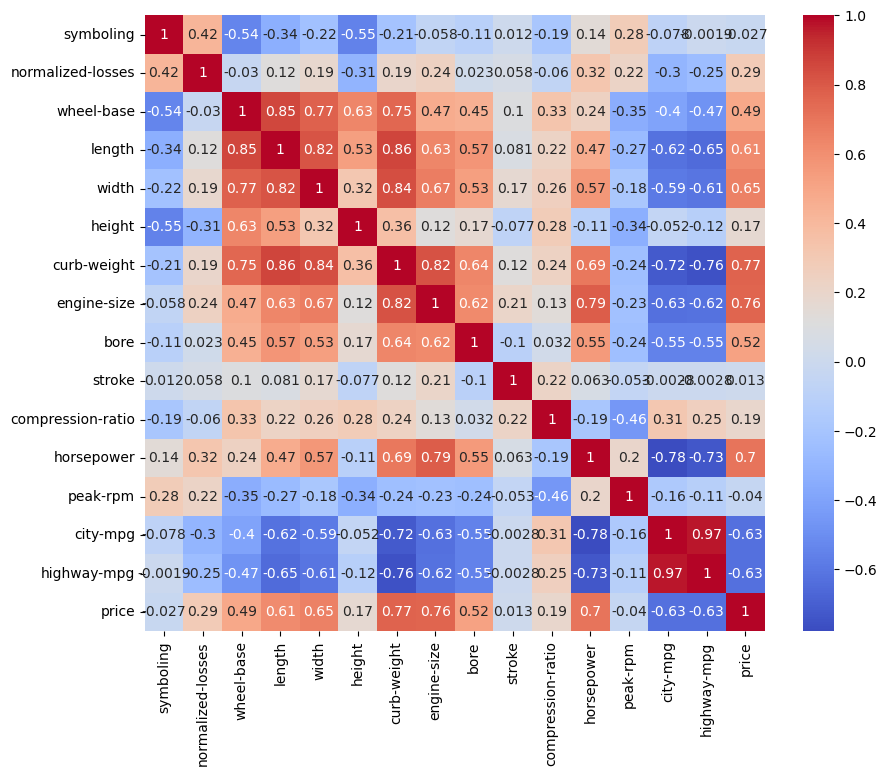

In [36]:
# Calcular la matriz de correlación solo con columnas numéricas
correlation_matrix = df_numeric.corr()
print("Matriz de correlación:\n", correlation_matrix)

# Visualizar la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          195 non-null    int64   
 1   normalized-losses  195 non-null    float64 
 2   make               195 non-null    category
 3   fuel-type          195 non-null    category
 4   aspiration         195 non-null    category
 5   num-of-doors       195 non-null    category
 6   body-style         195 non-null    category
 7   drive-wheels       195 non-null    category
 8   engine-location    195 non-null    category
 9   wheel-base         195 non-null    float64 
 10  length             195 non-null    float64 
 11  width              195 non-null    float64 
 12  height             195 non-null    float64 
 13  curb-weight        195 non-null    int64   
 14  engine-type        195 non-null    category
 15  num-of-cylinders   195 non-null    category
 16  engine-size  

## **Parte 2: Preparación de Datos**
 
**2. Preprocesamiento:**

Selección de características importantes.

In [56]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB
None


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Cargar los datos
path = '../../data/ml/house-prices.csv'
df = pd.read_csv(filepath_or_buffer=path, sep=',', header=0)

# Características (X) y target (y)
X = df.drop(columns='Price')  # 'Price' es la variable objetivo
y = df['Price']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Listas de características numéricas y categóricas
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Preprocesamiento de datos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes en numéricas
            ('scaler', StandardScaler())
        ]), num_features),
        
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores faltantes en categóricas
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_features)
    ])

# Crear pipeline que incluye el preprocesador y el modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Entrenar el pipeline completo
pipeline.fit(X_train, y_train)

# Obtener el modelo entrenado
model = pipeline.named_steps['model']

# Usar SelectFromModel para seleccionar características
selector = SelectFromModel(model, threshold="mean", prefit=True)

# Obtener las características transformadas
X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)

# Seleccionar las características importantes
X_train_selected = selector.transform(X_train_transformed)

# Obtener los nombres de las características seleccionadas
feature_names_transformed = pipeline.named_steps['preprocessor'].get_feature_names_out()
selected_features = feature_names_transformed[selector.get_support()]

print("Características seleccionadas:", selected_features)


Características seleccionadas: ['num__SqFt' 'cat__Neighborhood_West']


## **Parte 3: Modelos de Regresión**
 
**3. Regresión Lineal:**
 
Entrenamiento del modelo.
 
Evaluación del rendimiento (MSE y R²).
 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Cargar los datos
path = '../../data/ml/house-prices.csv'
df = pd.read_csv(filepath_or_buffer=path, sep=',', header=0)

# Características (X) y target (y)
X = df.drop(columns='Price')  # 'Price' es la variable objetivo
y = df['Price']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Listas de características numéricas y categóricas
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Preprocesamiento de datos
preprocessor = ColumnTransformer(
    transformers=[
        # Transformación de características numéricas
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes en numéricas
            ('scaler', StandardScaler())                  # Escalar las características numéricas
        ]), num_features),
        
        # Transformación de características categóricas
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores faltantes en categóricas
            ('encoder', OneHotEncoder(handle_unknown='ignore'))    # Codificar las variables categóricas
        ]), cat_features)
    ])

# Crear el pipeline con el preprocesador y el modelo de Regresión Lineal
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Entrenar el modelo de regresión lineal
pipeline.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evaluación del rendimiento
mse = mean_squared_error(y_test, y_pred)  # Error Cuadrático Medio
r2 = r2_score(y_test, y_pred)             # Coeficiente de determinación R²

# Imprimir los resultados de la evaluación
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación R²: {r2}")


Error Cuadrático Medio (MSE): 114251135.71732566
Coeficiente de Determinación R²: 0.8061565137761026


In [65]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Home', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Brick', 'Neighborhood'], dtype='object'))])),
                ('model', LinearRegression())])

In [66]:
y_pred

array([116125.18671995,  98554.11788281, 161325.52413568, 130707.78627053,
       153368.67940014, 139227.03117233, 148239.52715095,  96176.14286723,
       177199.6818547 , 136917.64544924, 168934.83230601, 101990.35099901,
       133127.92938452, 126629.87717146, 143988.76947873, 128587.30137898,
       110792.15380679, 137319.18646654, 120970.35069067,  79761.16188374,
       124127.45378446, 130246.62196131, 125506.97421544, 125776.20843087,
       166134.22233942,  99674.06600829])

**K-Nearest Neighbors (KNN):**
 
Entrenamiento del modelo.
 
Evaluación del rendimiento (MSE y R²).

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Cargar los datos
path = '../../data/ml/house-prices.csv'
df = pd.read_csv(filepath_or_buffer=path, sep=',', header=0)

# Características (X) y target (y)
X = df.drop(columns='Price')  # 'Price' es la variable objetivo
y = df['Price']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Listas de características numéricas y categóricas
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Preprocesamiento de datos
preprocessor = ColumnTransformer(
    transformers=[
        # Transformación de características numéricas
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes en numéricas
            ('scaler', StandardScaler())  # Escalar las características numéricas
        ]), num_features),
        
        # Transformación de características categóricas
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores faltantes en categóricas
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Codificar las variables categóricas
        ]), cat_features)
    ])

# Crear el pipeline con el preprocesador y el modelo KNN
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KNeighborsRegressor(n_neighbors=5))  # Modelo K-Nearest Neighbors (KNN)
])

# Entrenar el pipeline
pipeline.fit(X_train, y_train)  # Entrenamiento del modelo

# Realizar predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)  # Predicción en el conjunto de prueba

# Evaluación del rendimiento
mse = mean_squared_error(y_test, y_pred)  # Calcular el Error Cuadrático Medio (MSE)
r2 = r2_score(y_test, y_pred)  # Calcular el Coeficiente de Determinación R²

# Imprimir los resultados de la evaluación
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación R²: {r2}")


Error Cuadrático Medio (MSE): 163012800.0
Coeficiente de Determinación R²: 0.7234253361883466


In [68]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Home', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Brick', 'Neighborhood'], dtype='object'))])),
                ('model', KNeighborsRegressor())])

**Árbol de Decisión:**
 
Entrenamiento del modelo.

Evaluación del rendimiento (MSE y R²).

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Cargar los datos
path = '../../data/ml/house-prices.csv'
df = pd.read_csv(filepath_or_buffer=path, sep=',', header=0)

# Características (X) y target (y)
X = df.drop(columns='Price')  # 'Price' es la variable objetivo
y = df['Price']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Listas de características numéricas y categóricas
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Preprocesamiento de datos
preprocessor = ColumnTransformer(
    transformers=[
        # Transformación de características numéricas
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes en numéricas
            ('scaler', StandardScaler())  # Escalar las características numéricas
        ]), num_features),
        
        # Transformación de características categóricas
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores faltantes en categóricas
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Codificar las variables categóricas
        ]), cat_features)
    ])

# Crear el pipeline con el preprocesador y el modelo de Árbol de Decisión
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(random_state=42))  # Modelo Árbol de Decisión
])

# Entrenar el pipeline
pipeline.fit(X_train, y_train)  # Entrenamiento del modelo

# Realizar predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)  # Predicción en el conjunto de prueba

# Evaluación del rendimiento
mse = mean_squared_error(y_test, y_pred)  # Calcular el Error Cuadrático Medio (MSE)
r2 = r2_score(y_test, y_pred)  # Calcular el Coeficiente de Determinación R²

# Imprimir los resultados de la evaluación
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación R²: {r2}")


Error Cuadrático Medio (MSE): 473713846.15384614
Coeficiente de Determinación R²: 0.1962763185288191


In [70]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Home', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Brick', 'Neighborhood'], dtype='object'))])),
                ('model', DecisionTreeRegressor(random_state=42))])

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Cargar los datos
path = '../../data/ml/house-prices.csv'
df = pd.read_csv(filepath_or_buffer=path, sep=',', header=0)

# Características (X) y target (y)
X = df.drop(columns='Price')  # 'Price' es la variable objetivo
y = df['Price']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Listas de características numéricas y categóricas
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Preprocesamiento de datos
preprocessor = ColumnTransformer(
    transformers=[
        # Transformación de características numéricas
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes en numéricas
            ('scaler', StandardScaler())  # Escalar las características numéricas
        ]), num_features),
        
        # Transformación de características categóricas
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores faltantes en categóricas
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Codificar las variables categóricas
        ]), cat_features)
    ])

# Definir los tres modelos para la comparación
models = {
    'Regresión Lineal': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ]),
    'K-Nearest Neighbors (KNN)': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', KNeighborsRegressor())
    ]),
    'Árbol de Decisión': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', DecisionTreeRegressor(random_state=42))
    ])
}

# Entrenar y evaluar los modelos
results = {}
for model_name, model_pipeline in models.items():
    # Entrenamiento
    model_pipeline.fit(X_train, y_train)
    
    # Predicción
    y_pred = model_pipeline.predict(X_test)
    
    # Evaluación del rendimiento
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Guardar los resultados
    results[model_name] = {'MSE': mse, 'R²': r2}

# Mostrar los resultados de la comparación
for model_name, result in results.items():
    print(f"Modelo: {model_name}")
    print(f"  - MSE: {result['MSE']:.4f}")
    print(f"  - R²: {result['R²']:.4f}")
    print('-' * 50)


Modelo: Regresión Lineal
  - MSE: 114251135.7173
  - R²: 0.8062
--------------------------------------------------
Modelo: K-Nearest Neighbors (KNN)
  - MSE: 163012800.0000
  - R²: 0.7234
--------------------------------------------------
Modelo: Árbol de Decisión
  - MSE: 473713846.1538
  - R²: 0.1963
--------------------------------------------------


**Análisis de los Resultados**

Los resultados obtenidos muestran las métricas MSE y R² para los tres modelos:

**Regresión Lineal:**

MSE: 114,251,135.7173

R²: 0.8062

**Interpretación:** La Regresión Lineal presenta el mejor rendimiento entre los tres modelos, con un R² de 0.8062. Esto indica que aproximadamente el 80.62% de la variabilidad de la variable objetivo (precio de la vivienda) es explicada por el modelo, lo cual es un buen desempeño. Su MSE relativamente bajo muestra que las predicciones son bastante cercanas a los valores reales.
K-Nearest Neighbors (KNN):

MSE: 163,012,800.0000

R²: 0.7234

**Interpretación:** KNN tiene un MSE más alto que la Regresión Lineal, lo que sugiere que las predicciones son menos precisas. El R² de 0.7234 significa que el modelo explica aproximadamente el 72.34% de la variabilidad de la variable objetivo, lo cual sigue siendo un rendimiento decente, pero inferior al de la regresión lineal.
Árbol de Decisión:

MSE: 473,713,846.1538

R²: 0.1963

**Interpretación:** El Árbol de Decisión tiene el peor rendimiento en ambas métricas. El R² de 0.1963 indica que solo el 19.63% de la variabilidad es explicada por el modelo, lo cual es un rendimiento muy bajo. Además, el MSE es significativamente más alto, lo que sugiere que el modelo está generando predicciones muy inexactas, posiblemente debido a sobreajuste o una mala configuración del modelo.


**Discusión:**

**Regresión Lineal:** Este modelo sigue siendo el más confiable en este caso, con el mejor balance entre MSE y R². La relación entre las características y el precio de la vivienda parece ser razonablemente lineal, lo que lo hace adecuado para este tipo de datos.

**K-Nearest Neighbors (KNN):** Aunque KNN presenta un R² relativamente alto, su MSE es mucho mayor que el de la regresión lineal. Esto puede indicar que KNN tiene más variabilidad en sus predicciones y podría estar más influenciado por los valores atípicos o por la elección de parámetros como el número de vecinos (k).

**Árbol de Decisión:** Este modelo parece no estar funcionando bien con los datos. Un R² tan bajo y un MSE tan alto sugieren que el modelo puede estar sobreajustando los datos o no está bien sintonizado (por ejemplo, la profundidad del árbol no está limitada adecuadamente). Es posible que el árbol haya capturado demasiada complejidad en los datos de entrenamiento, pero no generaliza bien a los datos de prueba.

**Conclusión:**
**Recomendación:** En base a los resultados, el modelo de Regresión Lineal es el más adecuado para este conjunto de datos, ya que presenta el mejor equilibrio entre precisión y capacidad de generalización.

**Mejora de Modelos:** Para KNN y el Árbol de Decisión, podrían explorarse ajustes adicionales, como la selección de mejores hiperparámetros (por ejemplo, el valor de k en KNN o la profundidad máxima en el Árbol de Decisión) para mejorar el rendimiento de esos modelos.
 
**Próximos pasos:**
 
Probar regularización en los modelos (como Ridge o Lasso en la regresión lineal) para evitar sobreajuste.

Ajustar los hiperparámetros de KNN y Árbol de Decisión mediante búsqueda en cuadrícula (grid search) o búsqueda aleatoria (random search) para encontrar los valores óptimos.
Considerar modelos más complejos, como Random Forest o Gradient Boosting, si se busca mejorar aún más el rendimiento.

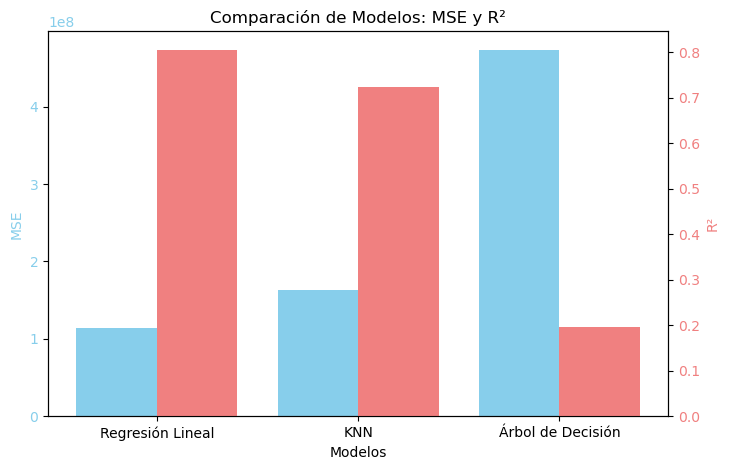

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Modelos y métricas
models = ['Regresión Lineal', 'KNN', 'Árbol de Decisión']
mse_values = [114251135.7173, 163012800.0000, 473713846.1538]
r2_values = [0.8062, 0.7234, 0.1963]

x = np.arange(len(models))  # Posiciones de las barras

fig, ax1 = plt.subplots(figsize=(8, 5))

# Crear el gráfico de barras para MSE
ax1.bar(x - 0.2, mse_values, 0.4, label='MSE', color='skyblue')
ax1.set_xlabel('Modelos')
ax1.set_ylabel('MSE', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Crear el gráfico de barras para R²
ax2 = ax1.twinx()  # Instancia de un segundo eje y para R²
ax2.bar(x + 0.2, r2_values, 0.4, label='R²', color='lightcoral')
ax2.set_ylabel('R²', color='lightcoral')
ax2.tick_params(axis='y', labelcolor='lightcoral')

# Títulos y etiquetas
ax1.set_title('Comparación de Modelos: MSE y R²')
ax1.set_xticks(x)
ax1.set_xticklabels(models)

plt.show()


**Comparacion de modelos de regresion**

Modelo: Regresión Lineal
  - MSE: 114251135.7173
  - R²: 0.8062
--------------------------------------------------
Modelo: K-Nearest Neighbors (KNN)
  - MSE: 163012800.0000
  - R²: 0.7234
--------------------------------------------------
Modelo: Árbol de Decisión
  - MSE: 473713846.1538
  - R²: 0.1963
--------------------------------------------------


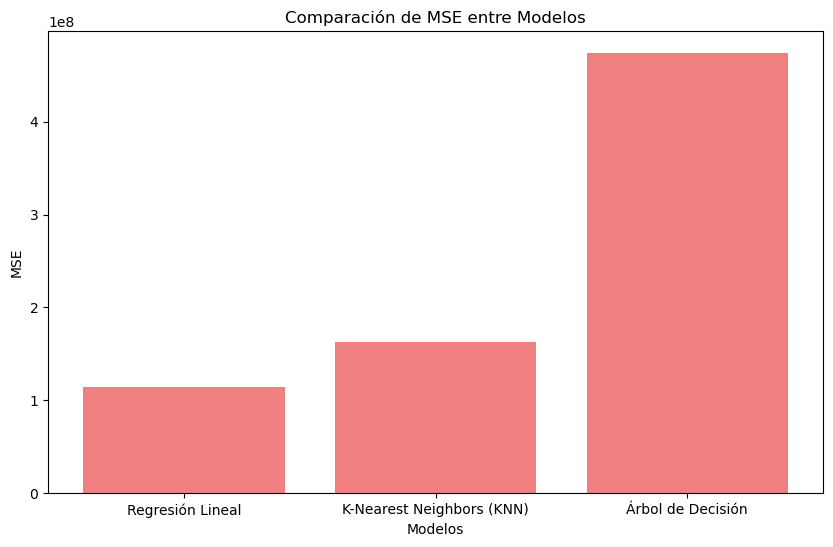

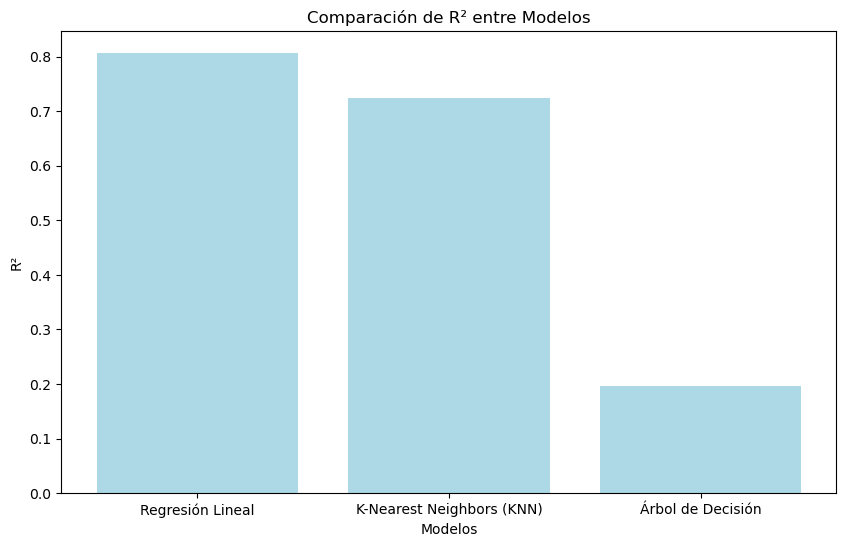

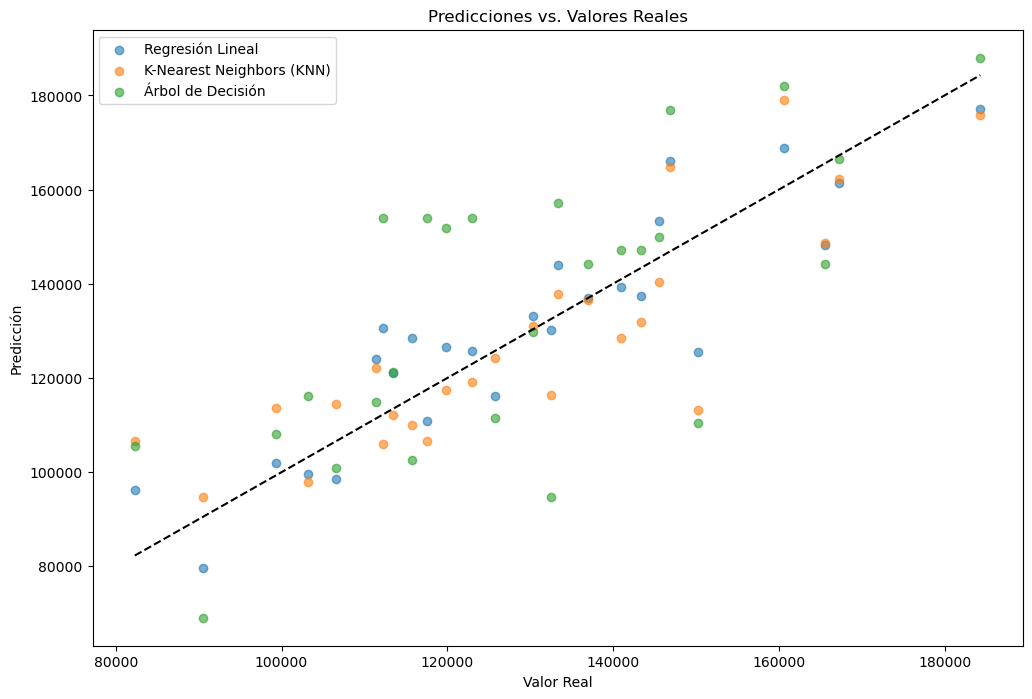

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
path = '../../data/ml/house-prices.csv'
df = pd.read_csv(filepath_or_buffer=path, sep=',', header=0)

# Características (X) y target (y)
X = df.drop(columns='Price')  # 'Price' es la variable objetivo
y = df['Price']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Listas de características numéricas y categóricas
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Preprocesamiento de datos
preprocessor = ColumnTransformer(
    transformers=[
        # Transformación de características numéricas
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes en numéricas
            ('scaler', StandardScaler())  # Escalar las características numéricas
        ]), num_features),
        
        # Transformación de características categóricas
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores faltantes en categóricas
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Codificar las variables categóricas
        ]), cat_features)
    ])

# Definir los tres modelos para la comparación
models = {
    'Regresión Lineal': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ]),
    'K-Nearest Neighbors (KNN)': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', KNeighborsRegressor())
    ]),
    'Árbol de Decisión': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', DecisionTreeRegressor(random_state=42))
    ])
}

# Entrenar y evaluar los modelos
results = {}
y_preds = {}  # Para guardar las predicciones de cada modelo
for model_name, model_pipeline in models.items():
    # Entrenamiento
    model_pipeline.fit(X_train, y_train)
    
    # Predicción
    y_pred = model_pipeline.predict(X_test)
    y_preds[model_name] = y_pred  # Guardar las predicciones
    
    # Evaluación del rendimiento
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Guardar los resultados
    results[model_name] = {'MSE': mse, 'R²': r2}

# Mostrar los resultados de la comparación
for model_name, result in results.items():
    print(f"Modelo: {model_name}")
    print(f"  - MSE: {result['MSE']:.4f}")
    print(f"  - R²: {result['R²']:.4f}")
    print('-' * 50)

# Graficar MSE y R² de los modelos
mse_values = [result['MSE'] for result in results.values()]
r2_values = [result['R²'] for result in results.values()]

# Gráfico de barras para MSE
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), mse_values, color='lightcoral')
plt.title('Comparación de MSE entre Modelos')
plt.xlabel('Modelos')
plt.ylabel('MSE')
plt.show()

# Gráfico de barras para R²
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), r2_values, color='lightblue')
plt.title('Comparación de R² entre Modelos')
plt.xlabel('Modelos')
plt.ylabel('R²')
plt.show()

# Graficar Predicciones vs Valores Reales para cada modelo
plt.figure(figsize=(12, 8))
for model_name, y_pred in y_preds.items():
    plt.scatter(y_test, y_pred, label=model_name, alpha=0.6)

# Línea de identidad (valores reales = valores predichos)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')  
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.legend()
plt.show()


**Conclusión Final**
 
**De acuerdo con los resultados obtenidos:**
 
El mejor modelo para la predicción de precios de autos es la Regresión Lineal, ya que tiene un buen balance entre simplicidad y rendimiento, con un R² alto (0.8062) y un MSE relativamente bajo.
 
El KNN es una opción viable, pero podría mejorar con una mayor sintonización de parámetros, como el número de vecinos.
 
El Árbol de Decisión no es adecuado en este caso debido a su bajo rendimiento tanto en MSE como en R², lo que sugiere que no está capturando bien la relación entre las características y el precio del auto.

## **Tareas Adicionales y Desafíos**
 
**8. Desafíos Adicionales:**
 
**Optimización de Modelos:** Usar GridSearchCV para optimizar los hiperparámetros de KNN y el Árbol de Decisión.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Definir el rango de valores para los parámetros a optimizar
param_grid_knn = {
    'model__n_neighbors': [3, 5, 7, 10],         # Número de vecinos
    'model__weights': ['uniform', 'distance'],   # Método de ponderación de los vecinos
    'model__metric': ['euclidean', 'manhattan']  # Métrica de distancia
}

# Crear el GridSearchCV para optimizar el modelo KNN
grid_search_knn = GridSearchCV(estimator=models['K-Nearest Neighbors (KNN)'], 
                               param_grid=param_grid_knn, 
                               cv=5,  # Validación cruzada con 5 particiones
                               n_jobs=-1,  # Usar todos los núcleos de CPU disponibles
                               scoring='neg_mean_squared_error',  # Evaluar con MSE
                               verbose=1)

# Ejecutar la búsqueda de hiperparámetros
grid_search_knn.fit(X_train, y_train)

# Mostrar los mejores parámetros y el rendimiento
print("Mejores parámetros para KNN:", grid_search_knn.best_params_)
print("Mejor puntuación (neg MSE) para KNN:", grid_search_knn.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Mejores parámetros para KNN: {'model__metric': 'manhattan', 'model__n_neighbors': 5, 'model__weights': 'distance'}
Mejor puntuación (neg MSE) para KNN: -187364521.37923282


In [81]:
from sklearn.tree import DecisionTreeRegressor

# Definir el rango de valores para los parámetros a optimizar
param_grid_tree = {
    'model__max_depth': [3, 5, 7, 10, None],  # Profundidad del árbol
    'model__min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    'model__min_samples_leaf': [1, 2, 4],  # Mínimo de muestras en una hoja
    'model__max_features': [None, 'sqrt', 'log2']  # Número máximo de características
}

# Crear el GridSearchCV para optimizar el modelo Árbol de Decisión
grid_search_tree = GridSearchCV(estimator=models['Árbol de Decisión'], 
                                param_grid=param_grid_tree, 
                                cv=5,  # Validación cruzada con 5 particiones
                                n_jobs=-1,  # Usar todos los núcleos de CPU disponibles
                                scoring='neg_mean_squared_error',  # Evaluar con MSE
                                verbose=1)

# Ejecutar la búsqueda de hiperparámetros
grid_search_tree.fit(X_train, y_train)

# Mostrar los mejores parámetros y el rendimiento
print("Mejores parámetros para Árbol de Decisión:", grid_search_tree.best_params_)
print("Mejor puntuación (neg MSE) para Árbol de Decisión:", grid_search_tree.best_score_)


Fitting 5 folds for each of 135 candidates, totalling 675 fits
Mejores parámetros para Árbol de Decisión: {'model__max_depth': 7, 'model__max_features': None, 'model__min_samples_leaf': 4, 'model__min_samples_split': 2}
Mejor puntuación (neg MSE) para Árbol de Decisión: -234247270.19128603


c:\Users\user\.conda\envs\bootcamp_mitic\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [82]:
# Entrenar el modelo con los mejores parámetros
best_tree_model = grid_search_tree.best_estimator_
best_tree_model.fit(X_train, y_train)

# Evaluar el rendimiento del modelo
y_pred_tree = best_tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("MSE optimizado para Árbol de Decisión:", mse_tree)
print("R² optimizado para Árbol de Decisión:", r2_tree)


MSE optimizado para Árbol de Decisión: 287978006.6522762
R² optimizado para Árbol de Decisión: 0.5114038874554427


In [90]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

C:\Users\user\AppData\Local\Temp\ipykernel_19948\3392526396.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['normalized-losses'].fillna(df['normalized-losses'].mean(), inplace=True)  # Rellenar con la media
C:\Users\user\AppData\Local\Temp\ipykernel_19948\3392526396.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we 

Modelo: Regresión Lineal
  - MSE: 13817776.6690
  - R²: 0.8228
--------------------------------------------------
Modelo: K-Nearest Neighbors (KNN)
  - MSE: 20921891.8397
  - R²: 0.7317
--------------------------------------------------
Modelo: Árbol de Decisión
  - MSE: 7772116.6540
  - R²: 0.9003
--------------------------------------------------


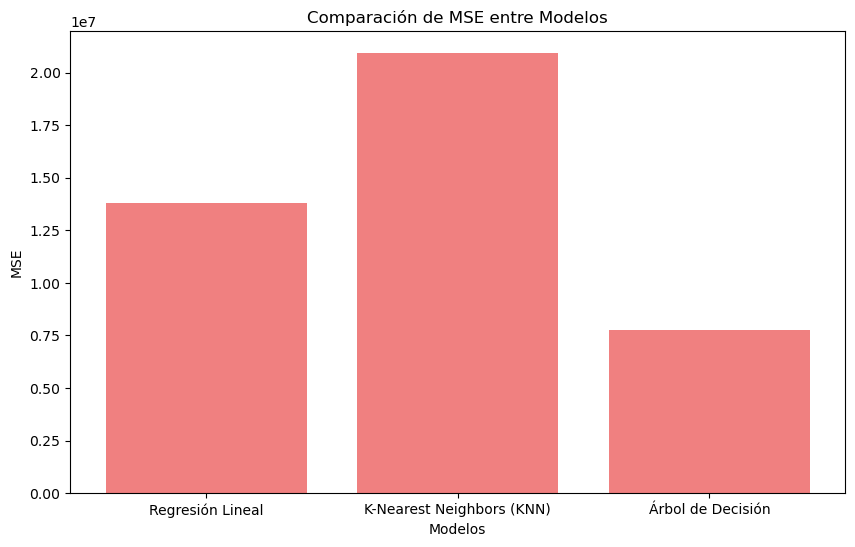

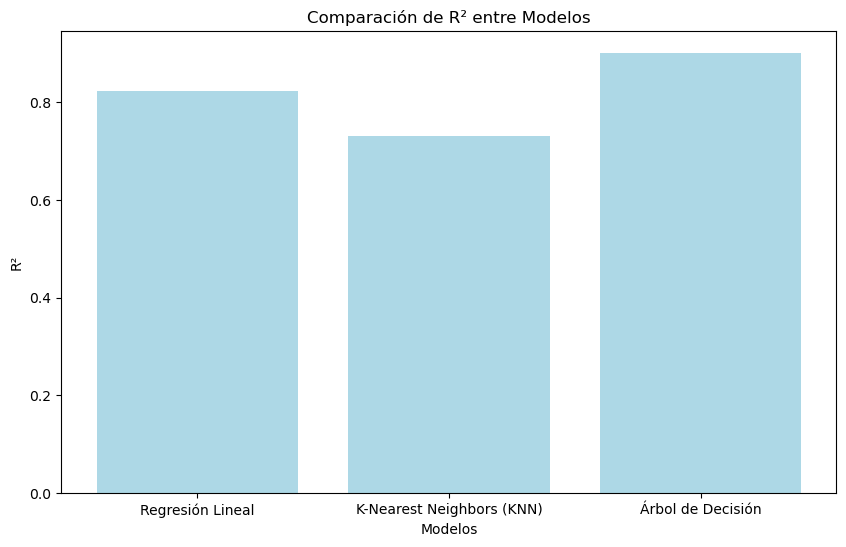

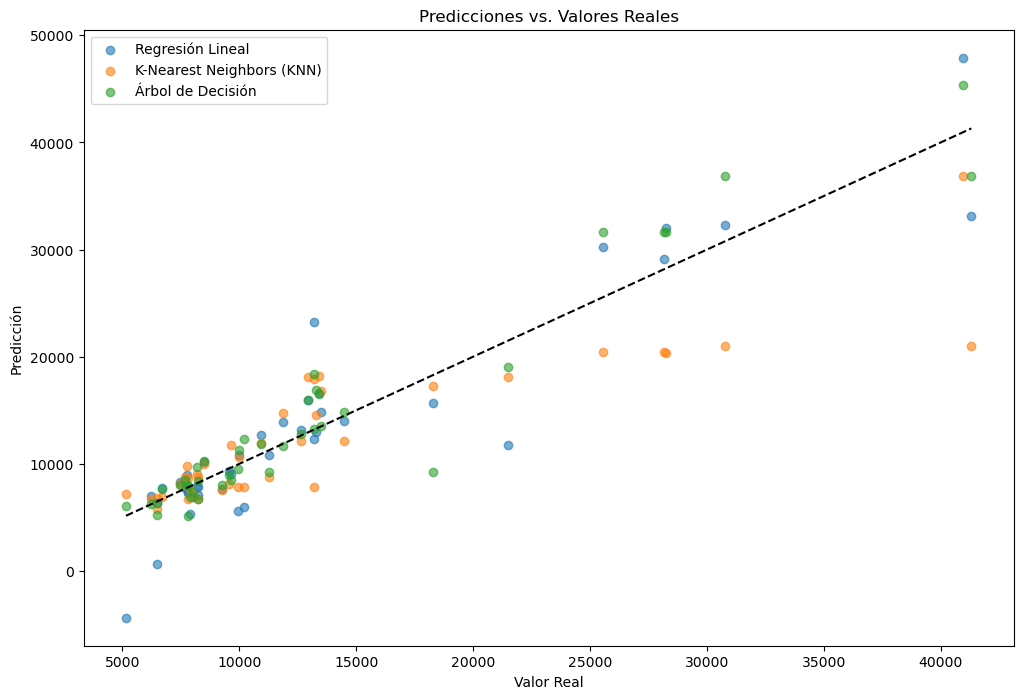

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Cargar los datos
path = '../../data/ml/Automobile_data.csv'  # Reemplaza esto con el path correcto
df = pd.read_csv(filepath_or_buffer=path, sep=',', header=0)

# 1. Conversión de columnas a tipo numérico donde sea necesario
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'], errors='coerce')  # Convertir a numérico, NaN si hay errores
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')  # Convertir a numérico
df['price'] = pd.to_numeric(df['price'], errors='coerce')  # Convertir a numérico
df['bore'] = pd.to_numeric(df['bore'], errors='coerce')  # Convertir a numérico
df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce')  # Convertir a numérico

# 2. Imputación de valores faltantes en las columnas numéricas
df['normalized-losses'].fillna(df['normalized-losses'].mean(), inplace=True)  # Rellenar con la media
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)  # Rellenar con la media
df['price'].fillna(df['price'].mean(), inplace=True)  # Rellenar con la media
df['bore'].fillna(df['bore'].mean(), inplace=True)  # Rellenar con la media
df['stroke'].fillna(df['stroke'].mean(), inplace=True)  # Rellenar con la media

# 3. Feature Engineering: Crear nuevas características
df['curb_weight_to_wheelbase'] = df['curb-weight'] / df['wheel-base']  # Relación entre peso y tamaño
df['length_to_width'] = df['length'] / df['width']  # Relación entre largo y ancho
df['horsepower_to_weight'] = df['horsepower'] / df['curb-weight']  # Relación entre potencia y peso
df['city_mpg_to_highway_mpg'] = df['city-mpg'] / df['highway-mpg']  # Relación entre consumo en ciudad y carretera

# Características (X) y target (y)
X = df.drop(columns='price')  # 'price' es la variable objetivo
y = df['price']  # La variable objetivo 'price'

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Listas de características numéricas y categóricas
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Preprocesamiento de datos
preprocessor = ColumnTransformer(
    transformers=[  
        # Transformación de características numéricas
        ('num', Pipeline(steps=[ 
            ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes en numéricas
            ('scaler', StandardScaler())  # Escalar las características numéricas
        ]), num_features),
        
        # Transformación de características categóricas
        ('cat', Pipeline(steps=[  
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores faltantes en categóricas
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Codificar las variables categóricas
        ]), cat_features)
    ])

# Definir los tres modelos para la comparación
models = {
    'Regresión Lineal': Pipeline(steps=[  
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ]),
    'K-Nearest Neighbors (KNN)': Pipeline(steps=[  
        ('preprocessor', preprocessor),
        ('model', KNeighborsRegressor())
    ]),
    'Árbol de Decisión': Pipeline(steps=[  
        ('preprocessor', preprocessor),
        ('model', DecisionTreeRegressor(random_state=42))
    ])
}

# Entrenar y evaluar los modelos
results = {}
y_preds = {}  # Para guardar las predicciones de cada modelo
for model_name, model_pipeline in models.items():
    # Entrenamiento
    model_pipeline.fit(X_train, y_train)
    
    # Predicción
    y_pred = model_pipeline.predict(X_test)
    y_preds[model_name] = y_pred  # Guardar las predicciones
    
    # Evaluación del rendimiento
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Guardar los resultados
    results[model_name] = {'MSE': mse, 'R²': r2}

# Mostrar los resultados de la comparación
for model_name, result in results.items():
    print(f"Modelo: {model_name}")
    print(f"  - MSE: {result['MSE']:.4f}")
    print(f"  - R²: {result['R²']:.4f}")
    print('-' * 50)

# Graficar MSE y R² de los modelos
mse_values = [result['MSE'] for result in results.values()]
r2_values = [result['R²'] for result in results.values()]

# Gráfico de barras para MSE
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), mse_values, color='lightcoral')
plt.title('Comparación de MSE entre Modelos')
plt.xlabel('Modelos')
plt.ylabel('MSE')
plt.show()

# Gráfico de barras para R²
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), r2_values, color='lightblue')
plt.title('Comparación de R² entre Modelos')
plt.xlabel('Modelos')
plt.ylabel('R²')
plt.show()

# Graficar Predicciones vs Valores Reales para cada modelo
plt.figure(figsize=(12, 8))
for model_name, y_pred in y_preds.items():
    plt.scatter(y_test, y_pred, label=model_name, alpha=0.6)

# Línea de identidad (valores reales = valores predichos)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')  
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.legend()
plt.show()



**Validación Cruzada:** Implementar validación cruzada para evaluar la estabilidad de los modelos.

C:\Users\user\AppData\Local\Temp\ipykernel_19948\2690633547.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['normalized-losses'].fillna(df['normalized-losses'].mean(), inplace=True)  # Rellenar con la media
C:\Users\user\AppData\Local\Temp\ipykernel_19948\2690633547.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we 

Modelo: Regresión Lineal
  - MSE (Test): 13817776.6690
  - R² (Test): 0.8228
  - CV MSE (Promedio): -56235206001042852779441006837760.0000
  - CV MSE (Desviación Estándar): 87021076731479930762639825698816.0000
--------------------------------------------------
Modelo: K-Nearest Neighbors (KNN)
  - MSE (Test): 20921891.8397
  - R² (Test): 0.7317
  - CV MSE (Promedio): -26346943.8080
  - CV MSE (Desviación Estándar): 12540982.0833
--------------------------------------------------
Modelo: Árbol de Decisión
  - MSE (Test): 7772116.6540
  - R² (Test): 0.9003
  - CV MSE (Promedio): -23936708.9656
  - CV MSE (Desviación Estándar): 11594400.5207
--------------------------------------------------


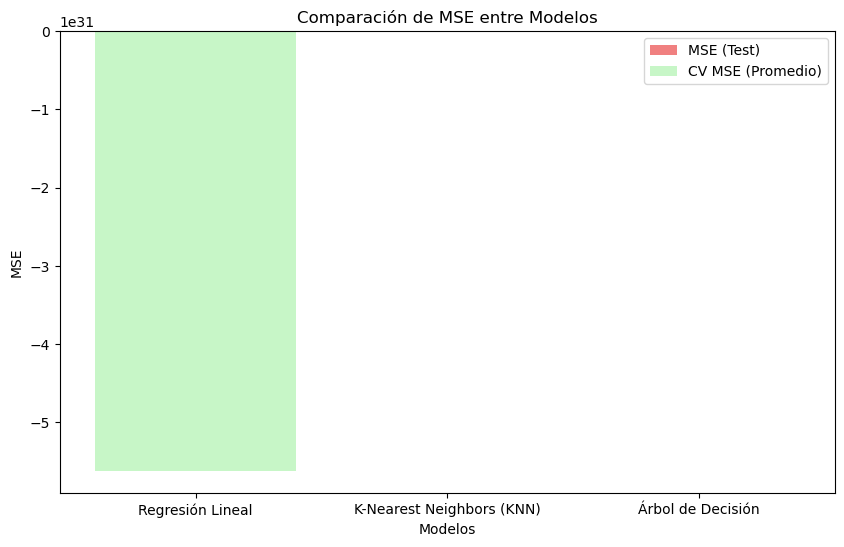

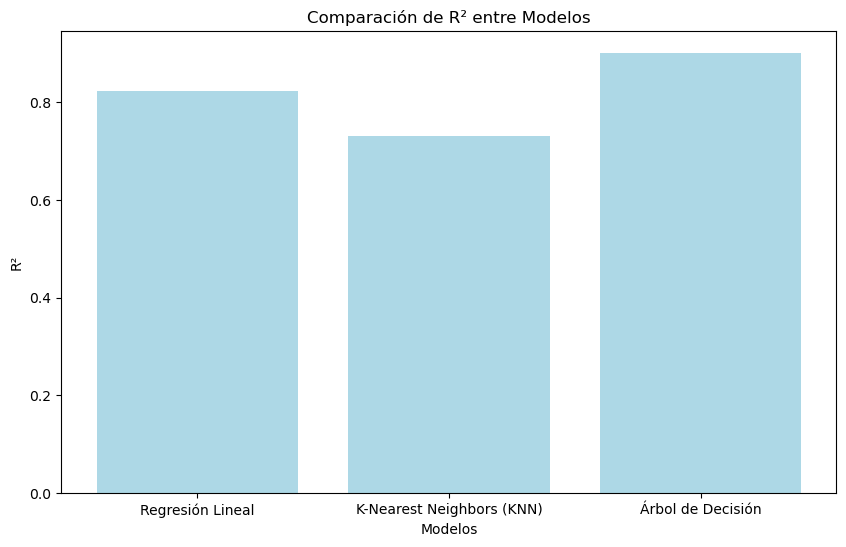

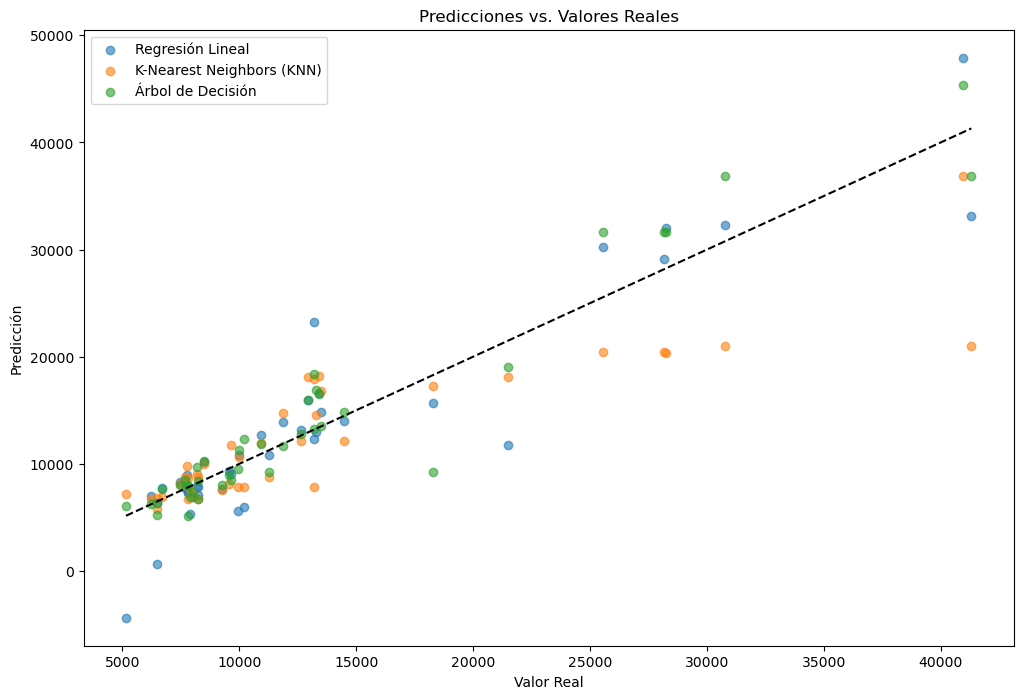

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Cargar los datos
path = '../../data/ml/Automobile_data.csv'  # Reemplaza esto con el path correcto
df = pd.read_csv(filepath_or_buffer=path, sep=',', header=0)

# 1. Conversión de columnas a tipo numérico donde sea necesario
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'], errors='coerce')  # Convertir a numérico, NaN si hay errores
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')  # Convertir a numérico
df['price'] = pd.to_numeric(df['price'], errors='coerce')  # Convertir a numérico
df['bore'] = pd.to_numeric(df['bore'], errors='coerce')  # Convertir a numérico
df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce')  # Convertir a numérico

# 2. Imputación de valores faltantes en las columnas numéricas
df['normalized-losses'].fillna(df['normalized-losses'].mean(), inplace=True)  # Rellenar con la media
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)  # Rellenar con la media
df['price'].fillna(df['price'].mean(), inplace=True)  # Rellenar con la media
df['bore'].fillna(df['bore'].mean(), inplace=True)  # Rellenar con la media
df['stroke'].fillna(df['stroke'].mean(), inplace=True)  # Rellenar con la media

# 3. Feature Engineering: Crear nuevas características
df['curb_weight_to_wheelbase'] = df['curb-weight'] / df['wheel-base']  # Relación entre peso y tamaño
df['length_to_width'] = df['length'] / df['width']  # Relación entre largo y ancho
df['horsepower_to_weight'] = df['horsepower'] / df['curb-weight']  # Relación entre potencia y peso
df['city_mpg_to_highway_mpg'] = df['city-mpg'] / df['highway-mpg']  # Relación entre consumo en ciudad y carretera

# Características (X) y target (y)
X = df.drop(columns='price')  # 'price' es la variable objetivo
y = df['price']  # La variable objetivo 'price'

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Listas de características numéricas y categóricas
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Preprocesamiento de datos
preprocessor = ColumnTransformer(
    transformers=[  
        # Transformación de características numéricas
        ('num', Pipeline(steps=[ 
            ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes en numéricas
            ('scaler', StandardScaler())  # Escalar las características numéricas
        ]), num_features),
        
        # Transformación de características categóricas
        ('cat', Pipeline(steps=[  
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores faltantes en categóricas
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Codificar las variables categóricas
        ]), cat_features)
    ])

# Definir los tres modelos para la comparación
models = {
    'Regresión Lineal': Pipeline(steps=[  
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ]),
    'K-Nearest Neighbors (KNN)': Pipeline(steps=[  
        ('preprocessor', preprocessor),
        ('model', KNeighborsRegressor())
    ]),
    'Árbol de Decisión': Pipeline(steps=[  
        ('preprocessor', preprocessor),
        ('model', DecisionTreeRegressor(random_state=42))
    ])
}

# Entrenar y evaluar los modelos con validación cruzada
results = {}
y_preds = {}  # Para guardar las predicciones de cada modelo
for model_name, model_pipeline in models.items():
    # Validación cruzada
    cv_scores = cross_val_score(model_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
    mean_cv_score = cv_scores.mean()  # Promedio de los MSE en las 5 particiones
    std_cv_score = cv_scores.std()  # Desviación estándar del MSE en las 5 particiones
    
    # Predicción en el conjunto de test
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    y_preds[model_name] = y_pred  # Guardar las predicciones
    
    # Evaluación del rendimiento en test
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Guardar los resultados
    results[model_name] = {
        'MSE': mse,
        'R²': r2,
        'CV_Mean_MSE': mean_cv_score,
        'CV_Std_MSE': std_cv_score
    }

# Mostrar los resultados de la comparación
for model_name, result in results.items():
    print(f"Modelo: {model_name}")
    print(f"  - MSE (Test): {result['MSE']:.4f}")
    print(f"  - R² (Test): {result['R²']:.4f}")
    print(f"  - CV MSE (Promedio): {result['CV_Mean_MSE']:.4f}")
    print(f"  - CV MSE (Desviación Estándar): {result['CV_Std_MSE']:.4f}")
    print('-' * 50)

# Graficar MSE y R² de los modelos
mse_values = [result['MSE'] for result in results.values()]
r2_values = [result['R²'] for result in results.values()]
cv_mse_values = [result['CV_Mean_MSE'] for result in results.values()]

# Gráfico de barras para MSE
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), mse_values, color='lightcoral', label='MSE (Test)')
plt.bar(results.keys(), cv_mse_values, color='lightgreen', alpha=0.5, label='CV MSE (Promedio)')
plt.title('Comparación de MSE entre Modelos')
plt.xlabel('Modelos')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Gráfico de barras para R²
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), r2_values, color='lightblue')
plt.title('Comparación de R² entre Modelos')
plt.xlabel('Modelos')
plt.ylabel('R²')
plt.show()

# Graficar Predicciones vs Valores Reales para cada modelo
plt.figure(figsize=(12, 8))
for model_name, y_pred in y_preds.items():
    plt.scatter(y_test, y_pred, label=model_name, alpha=0.6)

# Línea de identidad (valores reales = valores predichos)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')  
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.legend()
plt.show()
